In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [17]:
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.1508243

In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 582us/step - loss: 0.0688 - accuracy: 0.9783
Epoch 2/5
1875/1875 [==============================] - 1s 621us/step - loss: 0.0612 - accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 1s 591us/step - loss: 0.0532 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 1s 607us/step - loss: 0.0466 - accuracy: 0.9846
Epoch 5/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.0462 - accuracy: 0.9847


In [23]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0764 - accuracy: 0.9786


[0.07636181265115738, 0.978600025177002]

In [24]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.25765129e-10, 3.26061378e-09, 1.00596026e-07, 8.15210296e-06,
        2.38568286e-14, 4.08134693e-10, 2.99266498e-14, 9.99991417e-01,
        9.63632107e-09, 3.89985075e-07],
       [1.84973876e-13, 1.14538544e-07, 9.99999762e-01, 3.22599303e-09,
        4.12217245e-25, 7.95452806e-08, 5.64350566e-10, 7.69393969e-20,
        1.68352398e-11, 1.68198608e-19],
       [3.50131679e-09, 9.99882102e-01, 3.59264209e-06, 1.44359728e-06,
        3.05215440e-06, 2.27892187e-07, 8.91482514e-08, 9.11117677e-05,
        1.83211014e-05, 8.67342753e-10],
       [9.99987245e-01, 4.61805372e-10, 1.04079882e-05, 1.22052617e-08,
        2.12399057e-11, 8.42080325e-08, 1.28887814e-06, 9.62536895e-09,
        1.23182691e-08, 9.31040347e-07],
       [1.00223353e-07, 1.59049052e-10, 6.41247789e-06, 2.11709050e-08,
        9.95133936e-01, 1.27447330e-09, 1.21610455e-08, 1.81814357e-05,
        2.43524738e-07, 4.84108040e-03]], dtype=float32)>

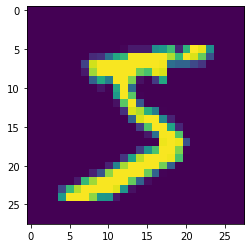

In [55]:
import matplotlib.pyplot as plt
A = x_train[:1]
# print(A)
plt.imshow(A[0])
# tf.nn.softmax(predictions).numpy()

In [57]:
x_train.shape

(60000, 28, 28)

In [67]:
import numpy as np
a = np.array([[1,2,3], [4,5,6], [7,8,9]])

a[:,1]

array([2, 5, 8])